# **MLP - Fashion MNIST**

- torchvision 데이터 셋을 사용하여 이미지 분류기를 생성
- 생성한 모델을 저장하고, 저장된 모델을 다시 불러와서 사용

## 주요 개념 리뷰
----

**[ 1. TensorDataset과 DataLoader ]**
- 입력 데이터를 쉽게 처리하고, 배치 단위로 잘러서 학습할 수 있게 도와주는 모듈
- **Dataset** : 학습시 사용하는 feature와 target의 pair로 이루어짐

- **DataLoader**: 학습 시 각 인스턴스에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)를 생성 및 shuffling, batch 등 ...

**[ 2. Device 설정 ]**
- GPU를 사용하여 학습을 진행하도록 명시적으로 작성 필요
- 연산 유형에 따라 GPU에서 수행이 불가능한 경우도 존재 ==> 명시적으로 어떤 프로세서에서 연산을 수행해야하는지 코드로 작성


**[ 3. 신경망 모델 생성 ]**
- **torch.nn 패키지**는 신경망 생성 및 학습 시 설정해야하는 다양한 기능을 제공
- 신경망을 **nn.Module**을 상속받아 정의
    - __ __init__ __(): 신경망에서 사용할 layer를 초기화하는 부분
    - __forward()__: feed foward 연산 수행 시, 각 layer의 입출력이 어떻게 연결되는지를 지정

**[ 4. 신경망 모델 컴파일 ]**
- 학습 시 필요한 정보들(loss function, optimizer)을 선언
- 일반적으로 loss와 optimizer는 아래와 같이 변수로 선언하고, 변수를 train/test 시 참고할 수 있도록 매개변수로 지정

**[ 5. 모델 학습 함수 ]**
- **신경망의 학습과정**을 별도의 함수로 구성하는 것이 일반적
    - feed forward -> loss -> error back propagation -> (log) -> (반복)

**[ 6. 모델 테스트 함수 ]**
- 학습과정과 비슷하나 error back propagate하는 부분이 없음
    - feed forward -> loss ->  (log) -> (반복)

**[ 7. 모델 반복 ]**
- 신경망 학습은 여러 epochs을 반복해서 수행하면서 모델을 구성하는 최적의 파라미터를 찾음
- 지정한 epochs 수만큼 **학습**과정과 **평가**과정을 반복하면서, 모델의 성능(loss, accuracy 등)을 체크함

## [Step 01] 라이브러리 및 데이터셋 로딩

> 들여쓴 블록

> 들여쓴 블록

> 들여쓴 블록

> **들여쓴 블록**









- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)
- Fashion MNIST 데이터셋은 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음
- 기본 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28×28 픽셀의 이미지 70,000개로 구성

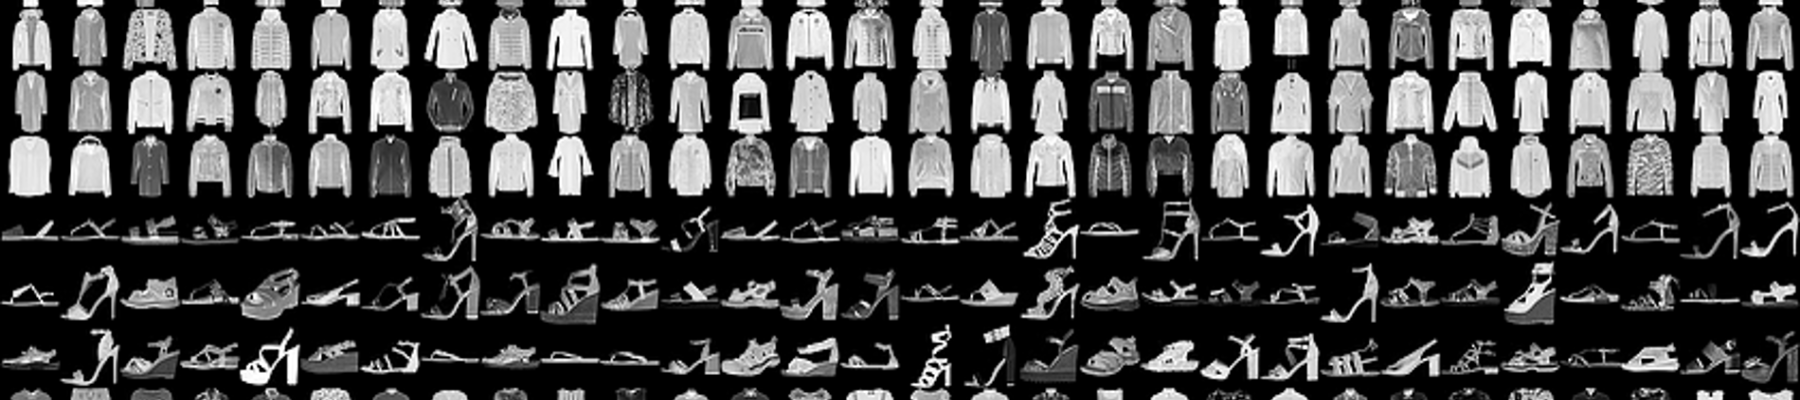

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# FashionMNIST 데이터 불러오기
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

## [Step 02] 데이터로더 생성

In [ ]:
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [ ]:
# Device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')

### 탐색적 데이터 분석(EDA)

In [ ]:
print(training_data, '\n------------------\n', test_data)

In [ ]:
training_data[0]

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

In [ ]:
img, label = training_data[0]
plt.imshow(img.squeeze(), cmap='gray')
print(f'label={label}')

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [ ]:
figure = plt.figure(figsize = (10, 4))
cols, rows = 5, 2

for i in range(1, cols * rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    print(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## [Step 03] 네트워크 모델 정의

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        output = self.classifier(x)
        return output

## [Step 04] 네트워크 모델 생성

In [ ]:
model = NeuralNetwork().to(device)
print(model)

Model 테스트

In [ ]:
X = torch.rand(1, 28, 28, device = device)
output = model(X)
print(f'모델 출력 결과: {output}\n')
pred_probab = nn.Softmax(dim=1)(output)
print(f'Softmax 결과: {pred_probab}\n')
y_pred = pred_probab.argmax()
print(y_pred)

## [Step 05] 네트워크 모델 컴파일

In [ ]:
# Loss
loss = nn.CrossEntropyLoss()

# Optimizer
learning_rate = 1e-3  #0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

## [Step 06] 모델 학습 함수

In [ ]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)

        # 손실 계산
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f}  [{current:>5d}]/{size:5d}')

## [Step 07] 모델 테스트 함수

In [ ]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

## [Step 08] 네트워크 모델 학습

In [ ]:
epochs = 10

for i in range(epochs) :
    print(f"Epoch {i+1} \n------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done!")

## [Step 09] 네트워크 모델 저장 및 불러오기

### parameter만 저장하고 불러오기

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
model2 = NeuralNetwork().to(device)
print(model2)

In [ ]:
model2.load_state_dict(torch.load('model_weights.pth'))

In [ ]:
model2.eval()
test_loop(test_dataloader, model2, loss)

### Model 전체를 저장하고 불러오기

In [ ]:
torch.save(model, 'model.pth')

In [ ]:
model3 = torch.load('model.pth')

In [ ]:
model3.eval()
test_loop(test_dataloader, model3, loss)